In [1]:
import pandas as pd
df_models = pd.read_csv("df_models.csv")
df_models.head()

,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,KM_per_Year
0,BMW,116,6700,15,100750,136,0,1,6716.666667
1,BMW,116,10499,11,107000,109,0,1,9727.272727
2,BMW,116,16950,8,76732,109,0,1,9591.500000
3,BMW,116,20980,2,14800,109,0,1,7400.000000
4,BMW,116,1500,17,221493,122,1,1,13029.000000


## 📈 Linear Regression – Baseline Model

I start the modeling phase with a **linear regression** as a baseline model.  
The goal here is to understand how the main features relate to price and to get an interpretable first benchmark.

### Features used
- **KM**  
- **Car_Age_Years**  
- **Power_HP**  
- **Accident_Free_Binary**  
- **Fuel_Group_ICE**

### Model Performance
- **R² ≈ 0.70**, meaning the model explains around **70% of the variance in price**, which is quite strong for a simple linear model.
- Most coefficients are **highly statistically significant**, except for *Accident-Free*.

### Key Coefficient Insights
- **KM**: Negative effect on price — higher mileage lowers the price.
- **Car Age**: Strong negative impact — older cars are significantly cheaper.
- **Power (HP)**: Strong positive effect — more powerful cars are more expensive.
- **Fuel (ICE)**: ICE cars are priced higher than electrified ones in this dataset.
- **Accident-Free**: Not statistically significant here, suggesting it may not add much explanatory power in this linear setup.

### Notes & Limitations
- The **condition number is high**, which supports earlier concerns about **multicollinearity**, especially between **KM** and **Car Age**.
- Residual diagnostics suggest some **non-normality**, which is common in price data and may motivate trying non-linear models.


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     894.5
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:49:33   Log-Likelihood:                -18200.
No. Observations:                1960   AIC:                         3.641e+04
Df Residuals:                    1954   BIC:                         3.645e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.746e+04 

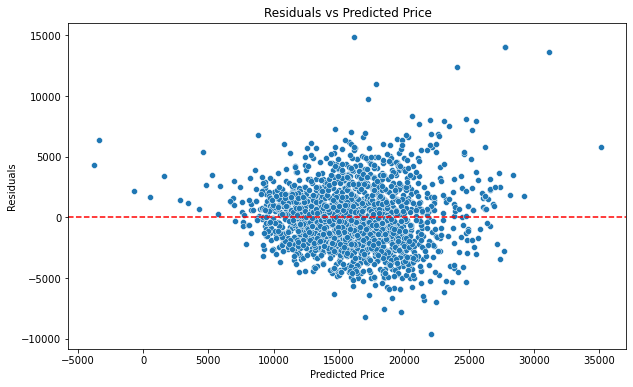

In [2]:
# ============================
# 1️⃣ Import libraries
# ============================
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 2️⃣ Select target and predictors
# ============================
# Target
y = df_models['Price'].astype(float)  # Convert to float

# Predictors
X = df_models[['KM','Car_Age_Years', 'Power_HP', 'Accident_Free_Binary', 'Fuel_Group_ICE']].astype(float)

# ============================
# 4️⃣ Add constant for intercept
# ============================
X = sm.add_constant(X)

# ============================
# 5️⃣ Fit linear regression model
# ============================
model = sm.OLS(y, X).fit()

# ============================
# 6️⃣ Print regression summary
# ============================
print(model.summary())

# ============================
# 7️⃣ Add predicted values to dataframe
# ============================
df_models['Price_Pred'] = model.predict(X)

# ============================
# 8️⃣ Plot residuals to check fit
# ============================
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_models['Price_Pred'], y=y - df_models['Price_Pred'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()




## 📊 Multicollinearity Check (VIF)

To check for multicollinearity, I computed **VIF values** for the linear regression features.

All predictors have **low VIF values (around 1–1.3)**, indicating that multicollinearity is **not a concern**.  
Although **KM** and **Car Age** are correlated, the VIF results confirm that this does not negatively impact the model.

This supports the reliability of the linear regression coefficients.


In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif)


                feature        VIF
0                 const  38.763297
1                    KM   1.303325
2         Car_Age_Years   1.270925
3              Power_HP   1.040395
4  Accident_Free_Binary   1.009991
5        Fuel_Group_ICE   1.092601


## 📉 Linear Regression with KM per Year

Even though the VIF analysis did not indicate multicollinearity issues, I also tested a linear regression using **KM per year** instead of separating **KM** and **Car Age**.

This transformation reduces feature redundancy but leads to a **much lower R² (~0.37)** compared to the baseline model.  
While the coefficients remain statistically significant, the model explains **substantially less variance in price**.


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     285.0
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          3.30e-193
Time:                        23:49:33   Log-Likelihood:                -18917.
No. Observations:                1960   AIC:                         3.784e+04
Df Residuals:                    1955   BIC:                         3.787e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7648.6186 

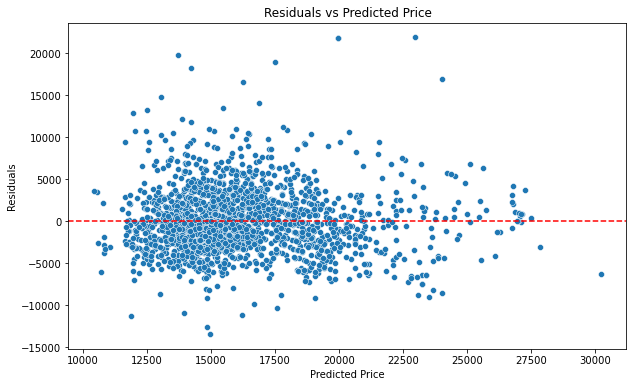

In [4]:
# ============================
# 1️⃣ Import libraries
# ============================
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 2️⃣ Select target and predictors
# ============================
# Target
y = df_models['Price'].astype(float)  # Convert to float

# Predictors
X = df_models[['KM_per_Year', 'Power_HP', 'Accident_Free_Binary', 'Fuel_Group_ICE']].astype(float)

# ============================
# 4️⃣ Add constant for intercept
# ============================
X = sm.add_constant(X)

# ============================
# 5️⃣ Fit linear regression model
# ============================
model = sm.OLS(y, X).fit()

# ============================
# 6️⃣ Print regression summary
# ============================
print(model.summary())

# ============================
# 7️⃣ Add predicted values to dataframe
# ============================
df_models['Price_Pred'] = model.predict(X)

# ============================
# 8️⃣ Plot residuals to check fit
# ============================
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_models['Price_Pred'], y=y - df_models['Price_Pred'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()




## 🧠 Preliminary Conclusions & Business Context

As business idea behind this analysis is to evaluate **which option makes more sense financially**:
- Buying a **second-hand car** and reselling it after **2–3 years**, or  
- Opting for a **leasing contract**

Using the linear regression results, we can estimate how car prices change with:
- **Age** (2–3 additional years)
- **Mileage** (≈ 15,000 km per year)
- **Power and fuel type**

This gives a rough idea of **how much value a car loses on average** over a typical ownership period.  
These insights can later be compared with leasing costs to assess which option is more cost-effective.

This is only a **first step**, and further modeling (including non-linear models) will be explored next to refine these estimates.

*Stay tuned for further modeling and deeper insights.*


## 💸 Estimated Value Loss (3 Year Horizon)

Using the **baseline linear regression model**, we can estimate how much value a car loses over time.

Assumptions:
- **+3 years** of ownership  
- **15,000 km per year** → **+45,000 km total**

Based on the model coefficients:
- **Car Age effect**: ~€1,070 loss per year  
  → 3 years ≈ **€3,200**
- **Mileage effect**: ~€0.038 loss per km  
  → 45,000 km ≈ **€1,700**

### 🔻 Estimated total value loss
**≈ €4,900 over 3 years**

This provides a rough benchmark for comparing **buying a second-hand car and reselling it** versus **leasing**.

⚠️ **Important note**  
This estimate only captures **depreciation**. It does **not** account for:
- Insurance costs  
- Maintenance and repairs  

These costs are usually **included in leasing contracts**, so they should be considered separately when making a full financial comparison.
